# This script demonstrates K-means clustering
### Name : Dohyun Kim
### Student ID : 2018120193
### Git : https://github.com/ppooiiuuyh/datamining_assignments/tree/master/assignment03


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math


In [2]:
def generatePointCluster(num_clusters, num_points):
    points = None
    for i in range(num_clusters):
        scale = random.random()*1+1
        x_pos = random.random()*6-5
        y_pos = random.random()*6-5

        #point[0] = x ; point[1] = y
        points_temp = np.random.rand(num_points,3)
        points_temp[:,0] = (points_temp[:,0] - np.mean(points_temp[:,0])) * scale + x_pos
        points_temp[:,1] = (points_temp[:,1] - np.mean(points_temp[:,1])) * scale + y_pos
        points_temp[:,2] = i

        points = points_temp if points is None else np.append(points,points_temp, axis=0)
    return points

#### define computeDistance: $\sqrt{(p1.x - p2.x)^2 + (p1.y - p2.y)^2} $

In [3]:
def computeDistance(p1,p2):
    #(p1.x - p2.x)**2 + (p1.y - p2.y)**2
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [9]:
def initialiseLabel(points,num_clusters):
    perm = np.random.permutation(points.shape[0])
    points[:,2] = points[perm,2]

In [5]:
def computeCentroid(points,num_clusters) :
    centroids = [[] for _ in range(num_clusters)]
    for i in range(len(points)):
        centroids[int(points[i][2])].append(points[i][0:2])
    centroids = [np.mean(centroids[i],axis=0) for i in range(len(centroids))]
    return centroids


In [6]:
def assignLabel(points, num_clusters):
    centroids = computeCentroid(points,num_clusters)
    for i in range(len(points)):
        min = 9999
        for e,c in enumerate(centroids):
            d = computeDistance(points[i],c)
            if d <= min :
                min = d
                points[i,2] = e

#### define computeEnergy: $ \frac{1}{N M}\sum_{c}^{C}\sum_{n}^{N}{ r_{cn}\sqrt{(p_{cn}.x - cent_c.x)^2 + (p_{cm}.y - cent_c.y)^2}  }$

In [7]:
def computeEnergy(points,num_clusters):
    centroids = computeCentroid(points, num_clusters)
    dist = []
    for i in range(len(points)):
        dist.append( np.sqrt( ((centroids[int(points[i][2])]) - (points[i][0:2]))**2))
    return np.mean(dist)

In [8]:
def plot(points, num_clusters):
    colors = cm.rainbow(np.linspace(0, 1, num_clusters))
    plt.scatter(points[:,0], points[:, 1], s=3, c=colors[ points[:,2].astype(int) ])
    plt.show()

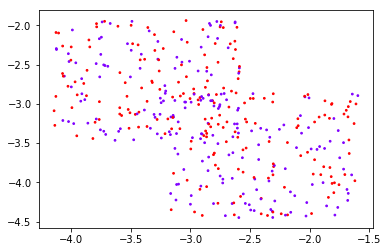

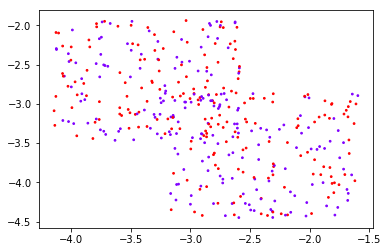

[0.5264581846501964, 0.43207207144639476]


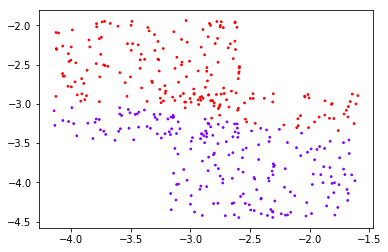

[0.5264581846501964, 0.43207207144639476, 0.3918730846655572]


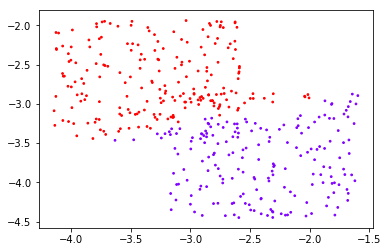

[0.5264581846501964, 0.43207207144639476, 0.3918730846655572, 0.38348643196200316]


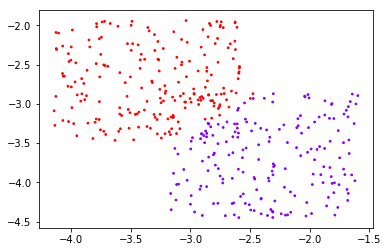

[0.5264581846501964, 0.43207207144639476, 0.3918730846655572, 0.38348643196200316, 0.3834889283045165]


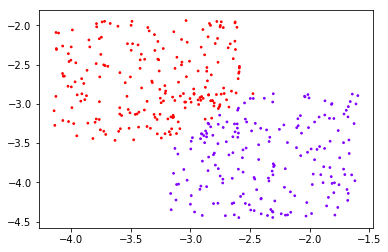

[0.5264581846501964, 0.43207207144639476, 0.3918730846655572, 0.38348643196200316, 0.3834889283045165, 0.38350617342380294]


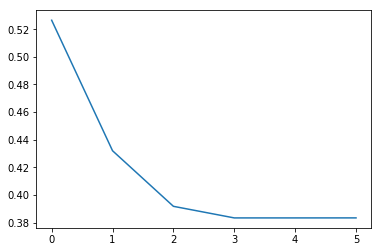

In [10]:
num_clusters = 2

points = generatePointCluster(num_clusters,200)

energies = []
initialiseLabel(points,num_clusters)
energies.append(computeEnergy(points, num_clusters))
plot(points, num_clusters)

for i in range(5):
    plot(points,num_clusters)
    assignLabel(points,num_clusters)
    energies.append(computeEnergy(points,num_clusters))
    print(energies)
plt.plot(range(len(energies)),energies)
plt.show()